In [ ]:
#Implementaion of Gradient Descent for Linear Regression

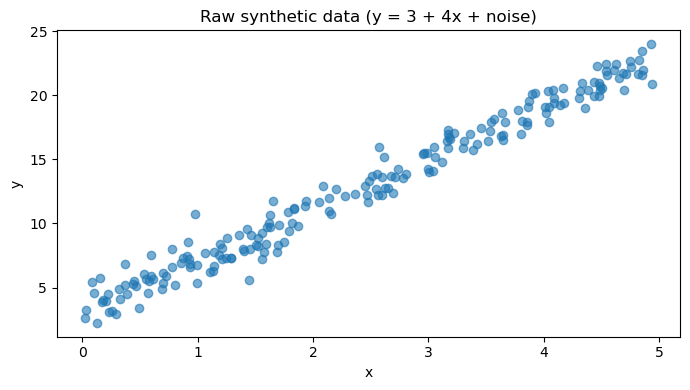

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# for reproducibility
np.random.seed(42)
# Generate x values (200 samples, uniform in [0,5])
# generate dataset
m=200
x=np.random.uniform(0, 5, m) # feature values
epsilon=np.random.normal(0,1,m) # gaussian noise
y=3+ 4*x +epsilon # response variable


# quick scatter plot to visualize
plt.figure(figsize=(7,4))
plt.scatter(x,y,alpha=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Raw synthetic data (y = 3 + 4x + noise)')
plt.tight_layout()
plt.show()

Closed-form (Normal Equation) parameters:
intercept=3.105201
slope=3.984386


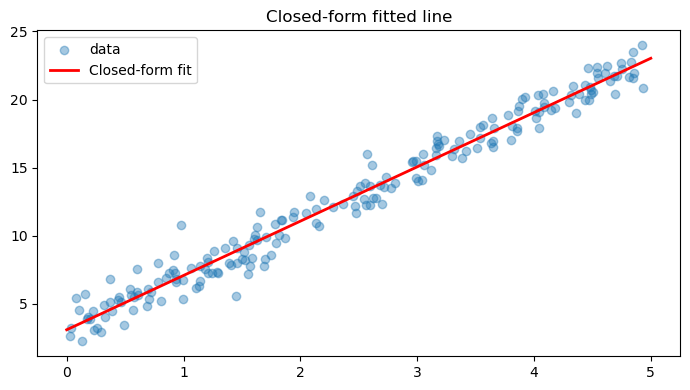

In [2]:
X =np.column_stack([np.ones(m),x]) # shape (m, 2)

# x values for plotting smooth fitted lines
x_line=np.linspace(0, 5, 200)

# For numerical stability we use np.linalg.solve when possible: solve(XtX, Xty)
# compute closed-form theta
XtX=np.dot(X.T,X)
Xty=np.dot(X.T,y)
# solve XtX * theta = Xty (better than explicitly inverting XtX)
theta_closed=np.linalg.solve(XtX,Xty)
intercept_closed, slope_closed=theta_closed


print('Closed-form (Normal Equation) parameters:')
print(f'intercept={intercept_closed:.6f}')
print(f'slope={slope_closed:.6f}')


# plot closed-form fitted line
y_line_closed = intercept_closed + slope_closed * x_line
plt.figure(figsize=(7,4))
plt.scatter(x, y, alpha=0.4, label='data')
plt.plot(x_line, y_line_closed, color='red', lw=2, label='Closed-form fit')
plt.legend()
plt.title('Closed-form fitted line')
plt.tight_layout()
plt.show()


Gradient Descent final parameters:
 intercept = 3.105201
 slope = 3.984386


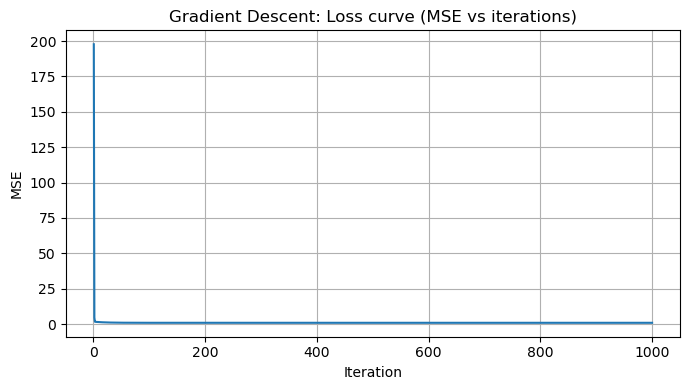

In [6]:
theta_gd = np.zeros(2) # [intercept, slope]
eta = 0.05
iterations = 1000
m = X.shape[0]


loss_history = []
# perform batch gradient descent
for it in range(iterations):
   predictions = np.dot(X, theta_gd)# shape (m,)
   residuals = predictions - y # shape (m,)
# gradient for J = (1/m) sum(residuals^2) is (2/m) X^T residuals
   gradients = (2.0 / m) * np.dot(X.T, residuals) # shape (2,)
# parameter update
   theta_gd = theta_gd - eta * gradients
# compute and store mean squared error (MSE) for plotting
   mse = np.mean(residuals ** 2)
   loss_history.append(mse)


intercept_gd, slope_gd = theta_gd
print('\nGradient Descent final parameters:')
print(f' intercept = {intercept_gd:.6f}')
print(f' slope = {slope_gd:.6f}')


# Plot loss curve (MSE vs iterations)
# A well-behaved gradient descent should show a monotonically decreasing loss that flattens out.
plt.figure(figsize=(7,4))
plt.plot(np.arange(1, iterations+1), loss_history)
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('Gradient Descent: Loss curve (MSE vs iterations)')
plt.grid(True)
plt.tight_layout()
plt.show()


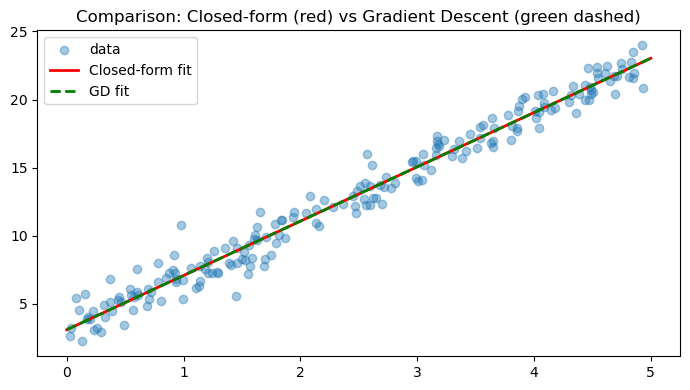

In [7]:
#plotting closed form and gradient descent 
y_line_gd = intercept_gd + slope_gd * x_line

plt.figure(figsize=(7,4))
plt.scatter(x, y, alpha=0.4, label='data')
plt.plot(x_line, y_line_closed, color='red', lw=2, label='Closed-form fit')
plt.plot(x_line, y_line_gd, color='green', lw=2, linestyle='--', label='GD fit')
plt.legend()
plt.title('Comparison: Closed-form (red) vs Gradient Descent (green dashed)')
plt.tight_layout()
plt.show()


In [23]:
print('Closed-form theta:', theta_closed)
print('GD theta: ', theta_gd)


Closed-form theta: [3.10520115 3.98438579]
GD theta:  [3.10520115 3.98438579]


In [ ]:
# The closed-form (Normal Equation) gives the exact least-squares solution for this small problem, and
# Gradient Descent converges to the same solution (within numerical tolerance) when using an appropriate
# learning rate and enough iterations. The loss curve shows a rapid decrease at the start and then flattening
# as it reaches the minimum; this confirms the algorithm is minimizing MSE. If the loss oscillates or diverges,
# reduce the learning rate; if it is very slow to decrease, you might increase it or normalize features.


